In [2]:
!pip install wbdata

import pandas as pd
import wbdata
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation as ani

## Loading the Data

In [3]:
# Return list of all country/region codes:
wbdata.get_country()

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFG   Afghanistan
AFR   Africa
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA   Botswana
CAA   Sub-Saharan Africa (IFC classification)
CAF   Centr

To see possible datasets we can access via the API, use `get_source()`



In [4]:
wbdata.get_source()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  24  Poverty and Equity
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclus

In [5]:
SOURCE = 40 # "Population estimates and projections"

indicators_40 = wbdata.get_indicator(source=SOURCE)
indicators_40

id                 name
-----------------  -------------------------------------------------------------------
SH.DTH.0509        Number of deaths ages 5-9 years
SH.DTH.1014        Number of deaths ages 10-14 years
SH.DTH.1519        Number of deaths ages 15-19 years
SH.DTH.2024        Number of deaths ages 20-24 years
SH.DTH.IMRT        Number of infant deaths
SH.DTH.IMRT.FE     Number of infant deaths, female
SH.DTH.IMRT.MA     Number of infant deaths, male
SH.DTH.MORT        Number of under-five deaths
SH.DTH.MORT.FE     Number of under-five deaths, female
SH.DTH.MORT.MA     Number of under-five deaths, male
SH.DTH.NMRT        Number of neonatal deaths
SH.DYN.0509        Probability of dying among children ages 5-9 years (per 1,000)
SH.DYN.1014        Probability of dying among adolescents ages 10-14 years (per 1,000)
SH.DYN.1519        Probability of dying among adolescents ages 15-19 years (per 1,000)
SH.DYN.2024        Probability of dying among youth ages 20-24 years (per 1,000)

## Population function

In [6]:
def population(sex, year, age, country):
    """Function that takes in a SEX ("Male", "Female"), ... , COUNTRY=, .. 
    and returns a statistic for the given function arguments"""
    if sex == "Male":
        variable_labels = {"SP.POP." + str(age[0])+str(age[1]) + ".MA": sex}
    elif sex=="Female":
        variable_labels = {"SP.POP." + str(age[0])+str(age[1]) + ".FE": sex}
    pop_stats = wbdata.get_dataframe(variable_labels, country=country)
    pop_stats = pop_stats.filter(like=str(year), axis=0)
    return pop_stats[sex][0]

In [7]:
population("Female", 2010, (15,19), "CHN")

45907253.0

## Population DataFrames


In [8]:
def population_dataframes(indicators):
    """Returns a pandas DataFrame indexed by Region or Country and Year, 
    with columns giving counts of people in different age-sex groups."""
    # Create a dictionary of all corresponding ID's and keys in SOURCE 40 from WBDATA
    labels = {}
    for i in range(len(indicators)):
        col_id = indicators[i]['id']
        col_name = indicators[i]['name']
        labels[col_id] = col_name

    def find_labels(indicators):
        """Helper function that akes in an indicator object to filter through variable 
        keys and parse through necessary ID's to obtain relevant data. """
        # Filter through column ID strings to obtain relevant population data.
        r = re.compile("(SP.POP).[\d]{2}[A-Z0-9]{2}.[MAFE]{2}$")
        col_keys = list(filter(r.match, labels))

        # Add total population column at the end of COL_KEYS
        col_keys.append('SP.POP.TOTL')

        labels_filtered = {}
        for key, value in labels.items():
            if key in col_keys:
                labels_filtered[key] = value
        return labels_filtered

    df_labels = find_labels(indicators)
    return wbdata.get_dataframe(df_labels)

In [9]:
pop_df = population_dataframes(indicators_40)
pop_df.head()

Population ages 00-04, female  Population ages 00-04, male  \
country     date                                                               
Afghanistan 1960                       760938.0                     780471.0   
            1961                       795378.0                     808289.0   
            1962                       818678.0                     831163.0   
            1963                       834934.0                     851787.0   
            1964                       850992.0                     873022.0   

                  Population ages 05-09, female  Population ages 05-09, male  \
country     date                                                               
Afghanistan 1960                       583953.0                     598721.0   
            1961                       594819.0                     617341.0   
            1962                       611717.0                     637537.0   
            1963                       632901.0                     657620.0   
            1964                       654635.0                     676153.0   

                  Population ages 10-14, female  Population ages 10-14, male  \
country     date                                                               
Afghanistan 1960                       544194.0                     523122.0   
            1961                       547964.0                     528908.0   
            1962                       550019.0                     538026.0   
            1963                       551891.0                     550452.0   
            1964                       556047.0                     565257.0   

                  Population ages 15-19, female  Population ages 15-19, male  \
country     date                                                               
Afghanistan 1960                       447872.0                     478075.0   
            1961                       460206.0                     481616.0   
            1962                       477029.0                     485476.0   
            1963                       495604.0                     490025.0   
            1964                       511923.0                     496099.0   

                  Population ages 20-24, female  Population ages 20-24, male  \
country     date                                                               
Afghanistan 1960                       382542.0                     415970.0   
            1961                       388240.0                     421947.0   
            1962                       394896.0                     429297.0   
            1963                       402961.0                     437345.0   
            1964                       413203.0                     445246.0   

                  ...  Population ages 60-64, male  \
country     date  ...                                
Afghanistan 1960  ...                      93053.0   
            1961  ...                      93359.0   
            1962  ...                      94140.0   
            1963  ...                      95186.0   
            1964  ...                      96187.0   

                  Population ages 65-69, female  Population ages 65-69, male  \
country     date                                                               
Afghanistan 1960                        56624.0                      67283.0   
            1961                        57393.0                      67330.0   
            1962                        58326.0                      67197.0   
            1963                        59399.0                      67052.0   
            1964                        60569.0                      67117.0   

                  Population ages 70-74, female  Population ages 70-74, male  \
country     date                                                               
Afghanistan 1960                        34655.0                      40748.0   
            1961                 

### Cleaning the data

In [10]:
# Change "date" index to type INT.
pop_df.index = pop_df.index.set_levels(pop_df.index.levels[1].astype(int), level=1)

# Rename MultiIndex column "date" to "year"
pop_df = pop_df.rename_axis(index=['country', 'year'])

# Delete 2020 row for every country code
pop_df = pop_df[~pop_df.index.get_level_values('year').isin([2020])]

# Add population total breakdowns for male and female
cols_f = [col for col in pop_df.columns if 'female' in col]
cols_m = [col for col in pop_df.columns if col not in cols_f]
pop_df['Population, total female'] = pop_df.loc[:,cols_f].sum(axis=1)
pop_df['Population, total male'] = pop_df.loc[:, cols_m].sum(axis=1)
pop_df.head()

Population ages 00-04, female  Population ages 00-04, male  \
country     year                                                               
Afghanistan 1960                       760938.0                     780471.0   
            1961                       795378.0                     808289.0   
            1962                       818678.0                     831163.0   
            1963                       834934.0                     851787.0   
            1964                       850992.0                     873022.0   

                  Population ages 05-09, female  Population ages 05-09, male  \
country     year                                                               
Afghanistan 1960                       583953.0                     598721.0   
            1961                       594819.0                     617341.0   
            1962                       611717.0                     637537.0   
            1963                       632901.0                     657620.0   
            1964                       654635.0                     676153.0   

                  Population ages 10-14, female  Population ages 10-14, male  \
country     year                                                               
Afghanistan 1960                       544194.0                     523122.0   
            1961                       547964.0                     528908.0   
            1962                       550019.0                     538026.0   
            1963                       551891.0                     550452.0   
            1964                       556047.0                     565257.0   

                  Population ages 15-19, female  Population ages 15-19, male  \
country     year                                                               
Afghanistan 1960                       447872.0                     478075.0   
            1961                       460206.0                     481616.0   
            1962                       477029.0                     485476.0   
            1963                       495604.0                     490025.0   
            1964                       511923.0                     496099.0   

                  Population ages 20-24, female  Population ages 20-24, male  \
country     year                                                               
Afghanistan 1960                       382542.0                     415970.0   
            1961                       388240.0                     421947.0   
            1962                       394896.0                     429297.0   
            1963                       402961.0                     437345.0   
            1964                       413203.0                     445246.0   

                  ...  Population ages 65-69, male  \
country     year  ...                                
Afghanistan 1960  ...                      67283.0   
            1961  ...                      67330.0   
            1962  ...                      67197.0   
            1963  ...                      67052.0   
            1964  ...                      67117.0   

                  Population ages 70-74, female  Population ages 70-74, male  \
country     year                                                               
Afghanistan 1960                        34655.0                      40748.0   
            1961                        35363.0                      41520.0   
            1962                        36055.0                      42186.0   
            1963                        36757.0                      42704.0   
            1964                        37461.0                      42987.0   

                  Population ages 75-79, female  Population ages 75-79, male  \
country     year                                                               
Afghanistan 1960                        16990.0                      19683.0   
            1961                 

## Population Pyramids

For the sake of simplicity, visualizations will use world data only.

In [11]:
def generate_ppy_df(pop_df, country, year):
        """Takes in a population DataFrame and selects population 
        data for a specific country/region in YEAR, then modifies the
        DataFrame in a way that can be visualized. """
        new_df = pop_df[pop_df.index.get_level_values('country').isin([country])]
        country_df = new_df[new_df.index.get_level_values('year').isin([year])]
        ages = [col[16:21] for col in country_df.columns[::2]]
        ages = ages[:-3]
        ages.append('80+')
        f_pop = list(country_df.iloc[0])[::2][:-2]
        m_pop = list(country_df.iloc[0])[1::2][:-1]
        ppy_df = pd.DataFrame({'Age': ages,
                         'Population, total female': f_pop,
                         'Population, total male': m_pop})
        # Convert male population data to negative values for displaying purposes.
        ppy_df['Population, total male'] = ppy_df['Population, total male']*-1
        return ppy_df


def population_pyramid(region, year):
    """Takes as input a pandas DataFrame with columns providing counts 
    of people by age-sex groups, and constructs a population pyramid graph 
    for visualizing the data."""
    df=generate_ppy_df(pop_df, region, year)
    fig1 = plt.figure(figsize=(12,8))
    ax1 = plt.axes()
    
    ageAxis = df['Age'][::-1]
    fig1 = sns.barplot(x='Population, total female',
                            y='Age',
                            data=df,
                            order=ageAxis,
                            lw=0,
                            color='tomato')
    fig1 = sns.barplot(x='Population, total male',
                            y='Age',
                            data=df,
                            order=ageAxis,
                            lw=0,
                            color='dodgerblue')

    fig1.axvline(lw=3.5, color='w')
    fig1.set_title("{} Population Pyramid, {}".format(region, year), fontdict={'fontsize':14,'fontweight':3}, pad=15)                 
    fig1.set(xlabel="Population (hundreds of millions)", ylabel="Age Group");

Reorganized DataFrame to make suitable for graphing.

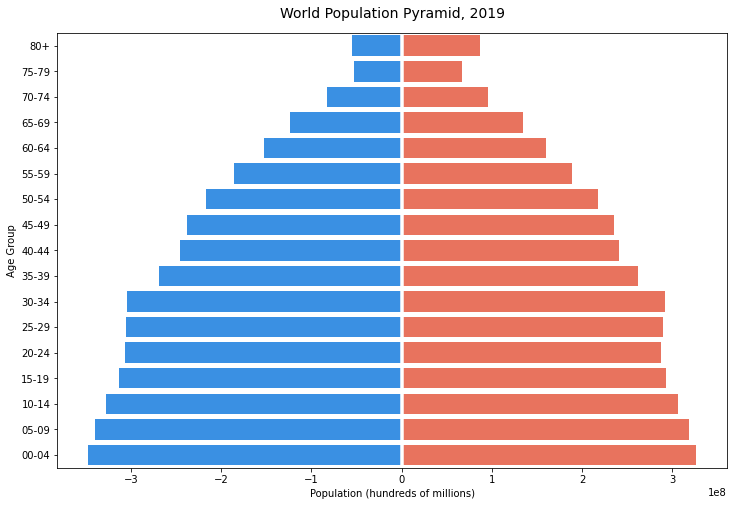

In [12]:
population_pyramid("World", 2019)

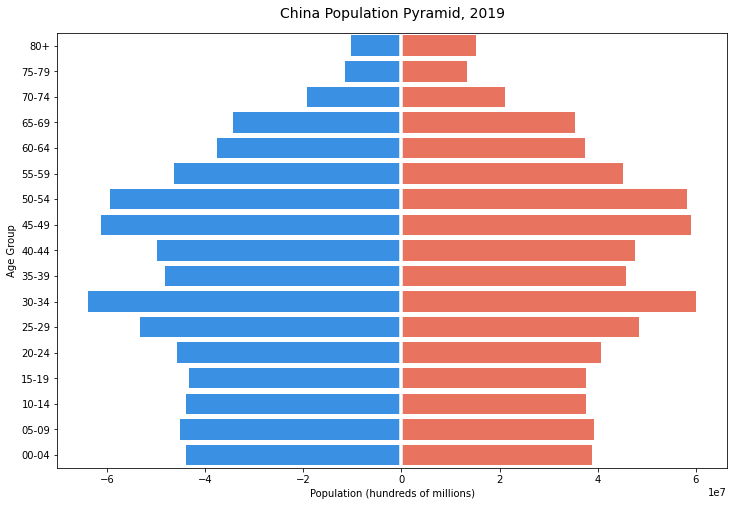

In [13]:
population_pyramid("China", 2019)

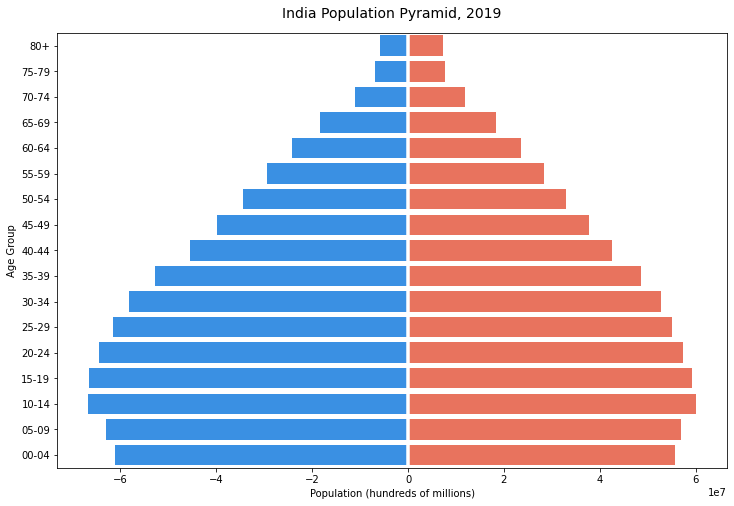

In [14]:
population_pyramid("India", 2019)

## Animated Population Pyramid 

<IPython.core.display.Javascript object>


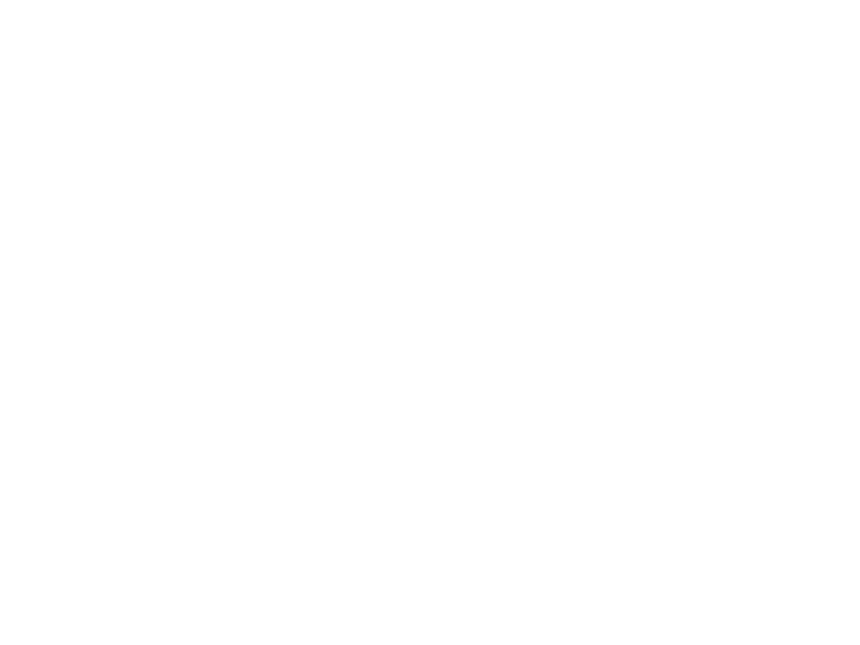

In [17]:
%matplotlib notebook
from matplotlib import animation, rc
from IPython.display import HTML

Writer = animation.writers['ffmpeg']
writer = Writer(fps=300, metadata=dict(artist='Me'), bitrate=1800)

fig2 = plt.figure()

region = "China"       # Replace with desired region

def animate(i):
    df=generate_ppy_df(pop_df, region, 1960+i)
    ageAxis=df['Age'][::-1]
    p = sns.barplot(x='Population, total female', y='Age', data=df, order=ageAxis, lw=0, color='tomato')
    p = sns.barplot(x='Population, total male', y='Age', data=df, order=ageAxis, lw=0, color='dodgerblue')
    p.axvline(lw=3.5, color='w')
    p.set_title("{r} Population Pyramid, {y}".format(r=region, y=1960+i), fontdict={'fontsize':14,'fontweight':3}, pad=15)
    plt.xlabel('Population (hundreds of millions)')
    plt.ylabel('Age Group')
    
anim=animation.FuncAnimation(fig2,animate,blit=False,frames=500,interval=200,repeat=True)